# DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import torch
import torchtext
import torchdata
import portalocker

OSError: [WinError 127] The specified procedure could not be found

### Data Analytics

In [2]:
# load data
data = pd.read_csv("./data/train.csv")

# check length of raw text 
data['length'] = data["comment_text"].apply(lambda x: len(x))
data['word_count'] = data["comment_text"].apply(lambda x: len(x.split(" ")))

In [3]:
avg_wc = round(data['word_count'].mean())
pct_over60 = round(sum(data['word_count'] > 60)/len(data), 2)
pct_over100 = round(sum(data['word_count'] > 100)/len(data), 2)
pct_over200 = round(sum(data['word_count'] > 200)/len(data), 2)

print("The training dataset contains {} online comments.".format(len(data)))
print("The average length of the raw text is {} (measured by characters)".format(avg_wc))
print("The proportion of comments that has over 60 words: {}".format(pct_over60))
print("The proportion of comments that has over 100 words: {}".format(pct_over100))
print("The proportion of comments that has over 200 words: {}".format(pct_over200))

The training dataset contains 159571 online comments.
The average length of the raw text is 68 (measured by characters)
The proportion of comments that has over 60 words: 0.32
The proportion of comments that has over 100 words: 0.18
The proportion of comments that has over 200 words: 0.06


Check character count distribution

<Axes: ylabel='Frequency'>

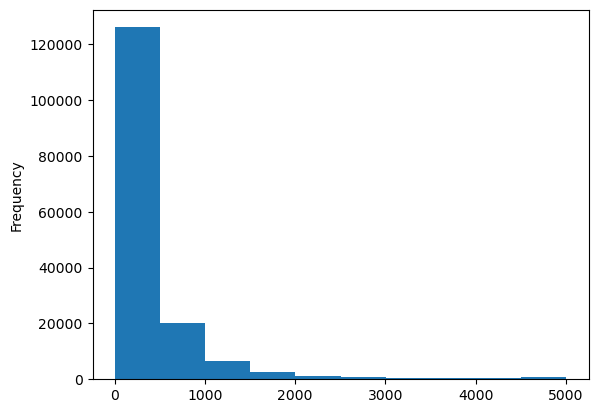

In [47]:
data['length'].plot.hist()

Check word count distribution for comments with no more than 200 words

<Axes: ylabel='Frequency'>

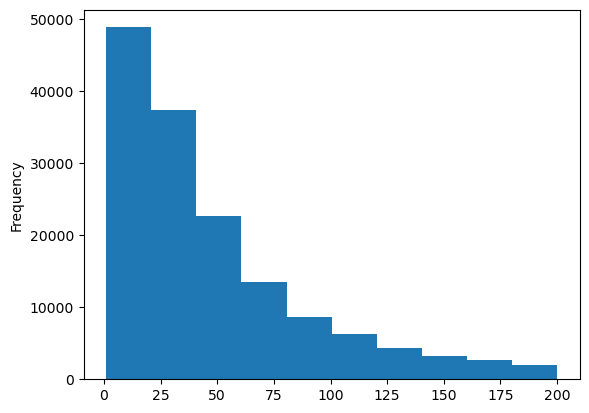

In [4]:
data['word_count'][data['word_count'] <= 200].plot.hist()

In [58]:
toxic_data = data[data["toxic"] == 1]
print("Inside the toxic dataset:")
print("Total number of records: ", len(toxic_data))
print("severe_toxic: ", np.sum(toxic_data["severe_toxic"]))
print("obscene: ", np.sum(toxic_data["obscene"]))
print("threat: ", np.sum(toxic_data["threat"]))
print("insult: ", np.sum(toxic_data["insult"]))
print("identity_hate:", np.sum(toxic_data["identity_hate"]))

Inside the toxic dataset:
Total number of records:  15294
severe_toxic:  1595
obscene:  7926
threat:  449
insult:  7344
identity_hate: 1302


In [57]:
non_toxic_data = data[data["toxic"] == 0]
print("Inside the non-toxic dataset:")
print("Total number of records: ", len(non_toxic_data))
print("severe_toxic: ", np.sum(non_toxic_data["severe_toxic"]))
print("obscene: ", np.sum(non_toxic_data["obscene"]))
print("threat: ", np.sum(non_toxic_data["threat"]))
print("insult: ", np.sum(non_toxic_data["insult"]))
print("identity_hate:", np.sum(non_toxic_data["identity_hate"]))


Inside the non-toxic dataset:
Total number of records:  144277
severe_toxic:  0
obscene:  523
threat:  29
insult:  533
identity_hate: 103


### Train Test Split

In [63]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

def balance_data(dataset, label):
    '''
    Depending on the chosen label, the function provide 
    a balanced dataset on the label. The result dataset 
    will have equal number of label == 1/0
    '''
    pos_data = dataset[dataset[label] == 1]
    neg_data = dataset[dataset[label] == 0]
    neg_data_sample = neg_data.sample(n=len(pos_data), random_state=12)

    df = pd.concat([neg_data_sample, pos_data])
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    return df


class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        '''
        data: Pandas dataframe
        split: 
        '''
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data.iloc[index]
        # Extract the relevant columns from the CSV file
        text = sample["comment_text"]
        label = sample["toxic"]
        # Apply any transformations to the data
        if self.transform:
            text, label = self.transform(text, label)
        return text, label


In [68]:
# # sample and shuffle data to have balanced "toxic" label
# balanced_data = balance_data(data, "toxic")
# balanced_data.to_csv("./data/balanced_data.csv", index=False)

balanced_data = pd.read_csv("./data/balanced_data.csv")

# split data: train 70%, validation 20%, test 10%
train_data, rest_data = train_test_split(balanced_data, test_size=0.3, random_state=1)
val_data, test_data = train_test_split(rest_data, test_size=0.33, random_state=1)

In [69]:
# load data into customized datasets
train_set = CustomDataset(train_data)
val_set = CustomDataset(val_data)
test_set = CustomDataset(test_data)

print("train:", len(train_set), "validation:", len(val_set), "test", len(test_set))

train: 21411 validation: 6148 test 3029
